# Support Vector Machines

Support Vector Machines (SVMs) are powerful machine learning algorithms used for classification and regression tasks. They find the best hyperplane to separate classes, maximizing the margin between data points. SVMs can handle complex data using different kernel functions.

## Linear SVM classification

Imports

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

Data and model loading

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # Iris-Virginica

svm_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ]
)

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

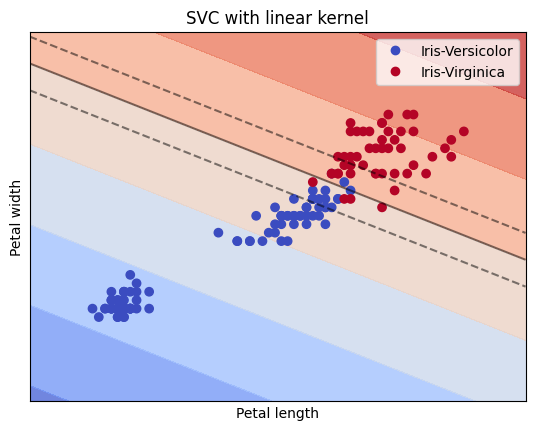

In [17]:
import matplotlib.pyplot as plt

# create a mesh to plot in
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Add margin lines
plt.contour(
    xx, yy, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# Plot the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("SVC with linear kernel")

# Add a legend
plt.legend(
    handles=scatter.legend_elements()[0], labels=["Iris-Versicolor", "Iris-Virginica"]
)

plt.show()

## Non-linear SVM classification

The kernel trick is a key concept in Support Vector Machines (SVMs) that allows them to efficiently handle nonlinear classification problems. Instead of explicitly mapping the data into a higher-dimensional space, the kernel trick computes the inner products between the data points in the higher-dimensional space without actually performing the transformation. This avoids the computational complexity associated with high-dimensional spaces and allows SVMs to implicitly capture complex nonlinear relationships. By selecting an appropriate kernel function, such as the Gaussian (RBF) kernel or polynomial kernel, SVMs can effectively separate nonlinearly separable classes and achieve higher classification accuracy.

Loading make moons data

In [18]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

Model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

poly_kernel_svm_clf = Pipeline(
    (
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
    )
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

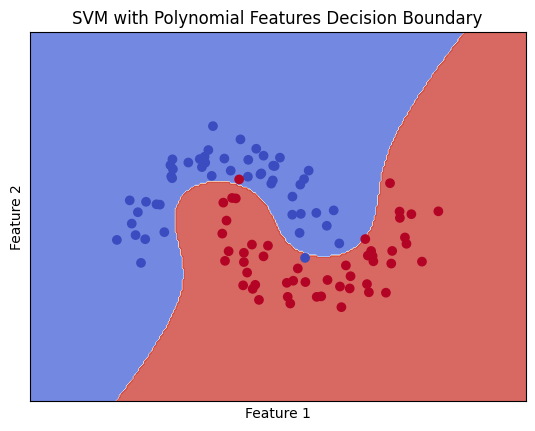

In [20]:
# Create a mesh to plot in
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict each point in the mesh
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


# Adding a title for the plot
plt.title("SVM with Polynomial Features Decision Boundary")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## RBF kernel 


Support Vector Machines (SVMs) with a Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, is a powerful model that can handle non-linear classification problems. The RBF kernel allows SVMs to create complex boundaries by creating new features based on similarity measures (gaussian distance) between instances, transforming the data into a higher dimensional space where it becomes linearly separable. The kernel's flexibility is controlled by the hyperparameters C (regularization) and gamma, where C determines the trade-off between achieving a low error on the training data and maintaining a smooth decision boundary, and gamma controls the influence of individual training instances, with low values implying a larger influence radius and high values leading to a tighter fit to the data.

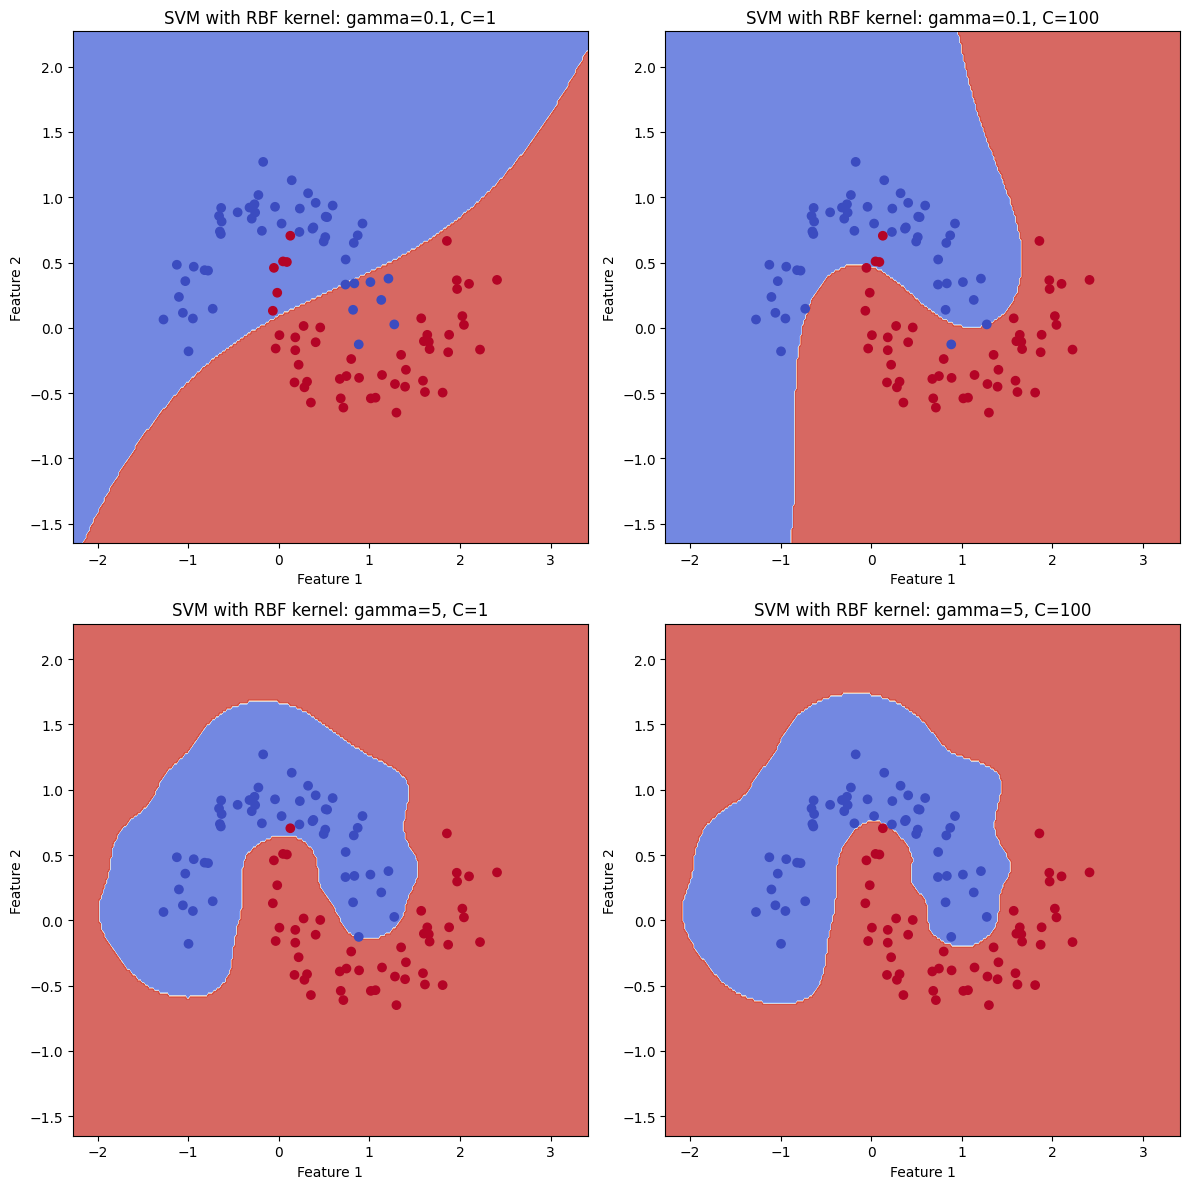

In [21]:
# List of (gamma, C) pairs for RBF kernel
param_list = [(0.1, 1), (0.1, 100), (5, 1), (5, 100)]

# Create a mesh to plot in
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.figure(figsize=(12, 12))

for i, (gamma, C) in enumerate(param_list):
    # Training the SVM classifier
    rbf_kernel_svm_clf = Pipeline(
        [("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))]
    )
    rbf_kernel_svm_clf.fit(X, y)

    # Predict each point in the mesh
    Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i + 1)
    plt.title(f"SVM with RBF kernel: gamma={gamma}, C={C}")
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()